## Fishing with SAC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import gym
import gym_fishing

from stable_baselines3 import SAC

In [2]:
# We use fishing-v1 to test SAC because it use a continuous action space
env = gym.make('fishing-v1')
env.n_actions = 100
model = SAC('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [3]:
model.learn(total_timesteps=200000)

-------
---------------------------------
| time/              |          |
|    episodes        | 30160    |
|    fps             | 51       |
|    time_elapsed    | 3848     |
|    total timesteps | 198630   |
| train/             |          |
|    actor_loss      | -0.525   |
|    critic_loss     | 1.62e-05 |
|    ent_coef        | 0.00852  |
|    ent_coef_loss   | -0.799   |
|    learning_rate   | 0.0003   |
|    n_updates       | 198529   |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 30164    |
|    fps             | 51       |
|    time_elapsed    | 3849     |
|    total timesteps | 198659   |
| train/             |          |
|    actor_loss      | -0.516   |
|    critic_loss     | 1.38e-05 |
|    ent_coef        | 0.00853  |
|    ent_coef_loss   | -0.248   |
|    learning_rate   | 0.0003   |
|    n_updates       | 198558   |
---------------------------------
---------------------------------
| time

In [4]:
def simulate(environment, model):
  obs = env.reset()
  episode_return = 0.0
  output = np.zeros(shape = (1000, 4))

  for it in range(1000):
    action, _states = model.predict(obs)
    obs, reward, dones, info = env.step(action)  
    episode_return += reward
    output[it] = (it, obs, action, episode_return)
  return output

In [6]:
out = simulate(env, model)
np.savetxt("sac.csv", out, delimiter=",")

### Vizualisation

In [2]:
datapath = '/Users/kevinab/Desktop/PRe/conservation-agents/sac.csv'
results = pd.read_csv(datapath, names=['time','state','harvest','action'])

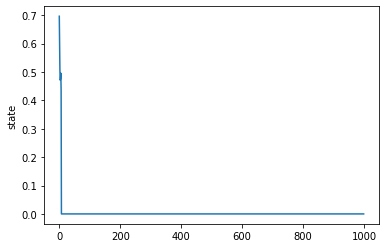

In [5]:
plt.plot(results.iloc[:,1])
plt.ylabel('state')
plt.show()

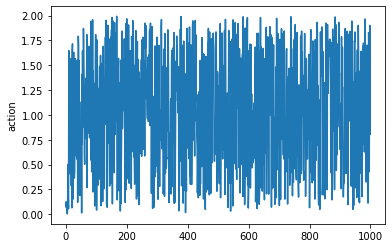

In [6]:
plt.plot(results.iloc[:,2])
plt.ylabel('action')
plt.show()

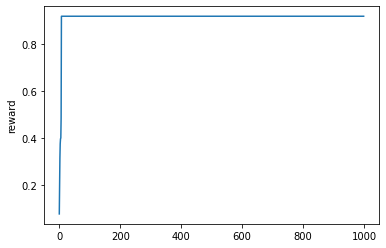

In [7]:
plt.plot(results.iloc[:,3])
plt.ylabel('reward')
plt.show()